### Importación de datos



In [1]:
import pandas as pd

url_1 = "https://raw.githubusercontent.com/Blackpachamame/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_1.csv"
url_2 = "https://raw.githubusercontent.com/Blackpachamame/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_3 = "https://raw.githubusercontent.com/Blackpachamame/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_4 = "https://raw.githubusercontent.com/Blackpachamame/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url_1)
tienda_2 = pd.read_csv(url_2)
tienda_3 = pd.read_csv(url_3)
tienda_4 = pd.read_csv(url_4)

tienda_1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## 1. Análisis de facturación

In [2]:
tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

ingresos_totales = [sum(tienda['Precio']) for tienda in tiendas]
print(ingresos_totales)

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]


Text(0.5, 1.0, 'Ingresos por Tienda')

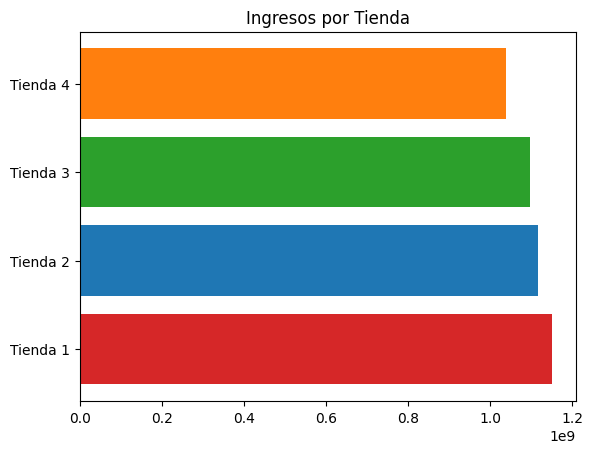

In [3]:
import matplotlib.pyplot as plt

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
plt.barh(nombres, ingresos_totales, color=bar_colors)

plt.title("Ingresos por Tienda")

## 2. Ventas por categoría

In [ ]:
def obtener_ventas_por_cat(tienda):
    return tienda.groupby("Categoría del Producto").size().sort_values(ascending=False).to_dict()

ventas_por_cat = [obtener_ventas_por_cat(tiendas[i]) for i in range(len(tiendas))]

[{'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}, {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}, {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Artículos para el hogar': 177, 'Instrumentos musicales': 177}, {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}]


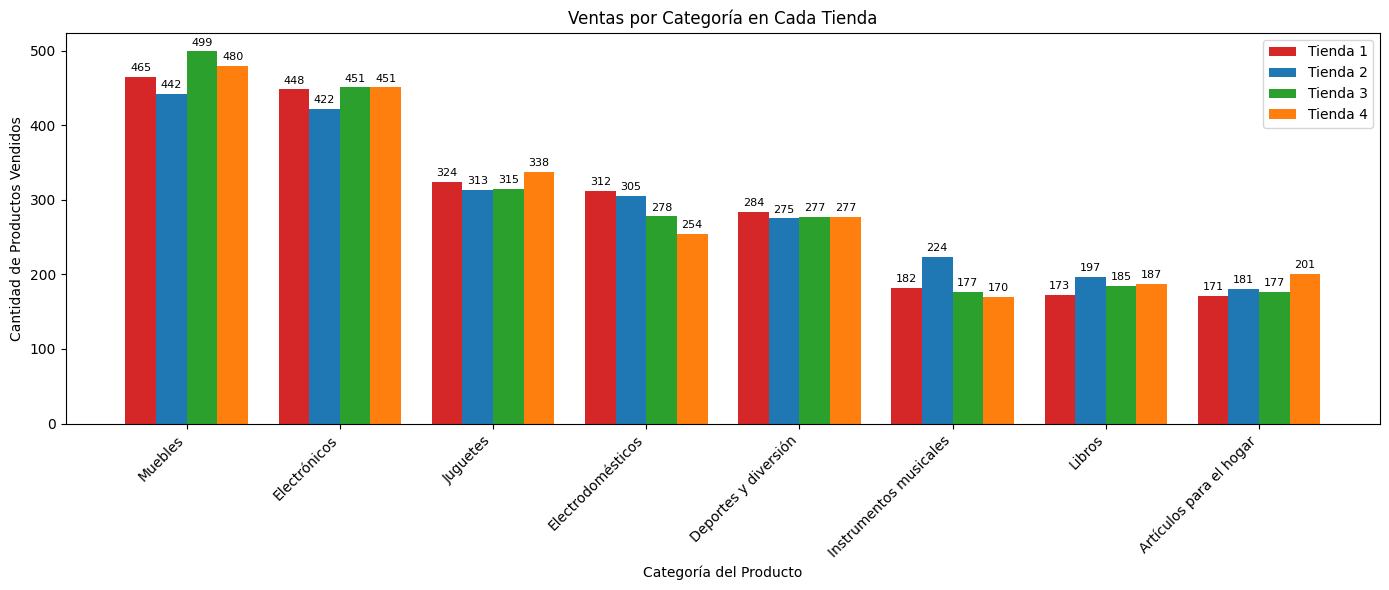

In [54]:
import numpy as np

# Categorías (ordenadas como en la primera tienda)
categorias = list(ventas_por_cat[0].keys())
n_categorias = len(categorias)
n_tiendas = len(ventas_por_cat)

# Valores por tienda por categoría
valores = [[ventas[cat] for cat in categorias] for ventas in ventas_por_cat]

# Posiciones X y ancho de barras
x = np.arange(n_categorias)
width = 0.2

# Crear gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Dibujar barras y etiquetas
for i in range(n_tiendas):
    bars = ax.bar(x + i * width, valores[i], width, label=nombres[i], color=bar_colors[i])
    
    # Añadir valores encima de cada barra
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # centro de la barra
            height + 5,                         # un poco encima de la barra
            f'{int(height)}',                   # valor redondeado
            ha='center', va='bottom', fontsize=8
        )

# Etiquetas y formato
ax.set_xlabel('Categoría del Producto')
ax.set_ylabel('Cantidad de Productos Vendidos')
ax.set_title('Ventas por Categoría en Cada Tienda')
ax.set_xticks(x + width * (n_tiendas - 1) / 2)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## 3. Calificación promedio de la tienda


## 4. Productos más y menos vendidos

## 5. Envío promedio por tienda